### Particle model: diffusion + first order reaction
Note that a non-uniform grid us used that is refined at the particle surface. In this way the effectiveness is still accurately computed for larger Thiele moduli.

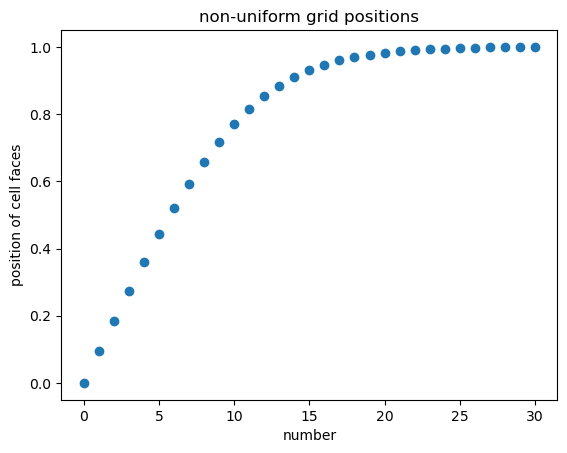

In [1]:
import matplotlib.pyplot as plt
from pymrm import non_uniform_grid

shape_c = (30,)
R = 1
dr_large = 0.1*R
r_f = non_uniform_grid(0, R, shape_c[0]+1, dr_large, 0.75)
plt.plot(r_f, marker = 'o', linestyle = '')
plt.title("non-uniform grid positions")
plt.xlabel("number")
plt.ylabel("position of cell faces")
plt.show()

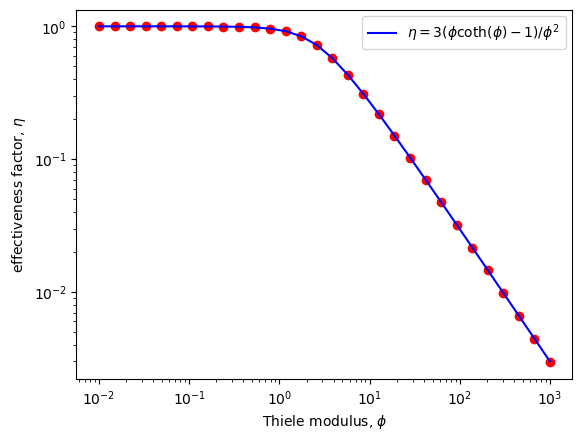

In [3]:
import math
import numpy as np
import scipy as sp
from scipy.sparse import linalg as sla
import matplotlib.pyplot as plt
from pymrm import construct_grad, construct_div

D = 1
phis = np.logspace(-2,3,30)
bc = ({'a':1 , 'b':0, 'd':0},{'a':0, 'b':1, 'd':1})
Grad, grad_bc = construct_grad(shape_c, r_f, bc=bc)
Div = construct_div(shape_c, r_f, nu=2, axis=0)
Lapl = Div @ Grad
lapl_bc = Div @ grad_bc

for phi in phis:
    k = phi**2*D/R
    Jac = k*sp.sparse.eye(math.prod(shape_c), format='csc') - Lapl
    Jac_lu = sla.splu(Jac)

    c = Jac_lu.solve(lapl_bc.toarray())
    k_app = (Grad[[-1],:] @ c + grad_bc[[-1]].toarray())[[0]]*(3*D/R)
    eta = k_app/k
    c = c.reshape(shape_c)
    plt.loglog(phi, eta, marker = 'o', linestyle = '', color = 'red')
plt.loglog(phis, 3*(phis/np.tanh(phis)-1)/(phis*phis), color = 'blue', label = r'$\eta = 3(\phi \coth(\phi)-1)/\phi^2$')
plt.xlabel(r'Thiele modulus, $\phi$')
plt.ylabel(r'effectiveness factor, $\eta$')
plt.legend()
plt.show()